# 1. Introduction

In the King County housing market, multiple dynamics play a major role in shaping the prosperity of Real Estate companies. Real estate development companies face significant challenges in navigating many complexities when it comes to deciding on the most important features to include in homes. 

The project aims to help a Real Estate Development Company looking to enter the King County housing market. This will be done by providing a comprehensive analysis that focuses on the key factors that influence housing prices. By leveraging data-driven approaches, we aim to uncover insights that will empower the stakeholder to make informed decisions.

With the insights gained from the data from the King County House Sales dataset, we hope to advise the Real Estate Development Company on the most important characteristics/features to focus on when constructing homes, in order to generate more income and be as profitable as possible. 






# 2. Problem Statement- Business Problem
The Real Estate Development Company is venturing into the King County Housing market and would like to develop a sales strategy that makes it profitable by targeting houses that have the highest prices in the market.<br>



## 3. Objectives
#### 1. Explore the Relationship Between Number of bathrooms and its price
- Investigate the relationship between the number of bathrooms (`bathrooms`) in a house and its price (`price`). Determine if houses with more bathrooms are priced higher.

#### 2. Explore the relationship between the square footage of the home and its price
- Investigate the relationship between the square footage of the home (`sqft_living`) and its price (`price`). Determine if houses with more square footage are priced higher.
#### 3. Explore the impact of the King County housing grading system on the pricing of homes in the market.
- Investigate the relationship between the grades awarded to a house (`grade`) and its price. Determine if houses with higher grades are priced higher. 
#### 4. Explore the impact of a home's neighborhood on its price
- Investigate the relationship between square footage of interior housing living space for the nearest 15 neighbors of a house and its price. Determine if the size of homes within a neighborhood affects the price of a house.

#### 5. Develop a Linear Regression Model to Predict Housing Prices
- Build and evaluate a linear regression model using features `bathrooms`, `sqft_living`, and `grade`to predict house prices (`price`). Provide the stakeholder with a predictive tool for estimating housing prices and supporting strategic decision-making in housing development.

# 4. Data Understanding: Notebook clearly describes the source and properties of the data to show how useful the data are for solving the problem of interest.
Describe the data sources and explain why the data are suitable for the project
Present the size of the dataset and descriptive statistics for all features used in the analysis
Justify the inclusion of features based on their properties and relevance for the project
Identify any limitations of the data that have implications for the project


## Imports and Data Loading

In [20]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [21]:
data = pd.read_csv('./Data/kc_house_data.csv')
data.head(4)



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000


# Exploratory data analysis

In [22]:
data.shape

(21597, 21)

There are 21 columns and 25,597 rows

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [24]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

These are the columns and their descriptions: 
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

A data description of the numerical columns

In [25]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 5. Data Cleaning

### Checking for duplicates

In [26]:
data.duplicated().sum()

0

There are no duplicates

### Looking for null values

In [27]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfront, view, and year renovated columns have null values<br>
    
- waterfront, view, yr_renovated: 2376, 63, 3842 missing values respectively<br>
- is,date, price, bedrooms, sqft_living, sqft_lot, floors, condition, grade, sqft_above, sqft_basement, yr_built, zipcode, lat, long, sqft_living15, sq_lot15: No missing values.<br>

In [28]:
# We will fill null values in the waterfront and view columns with the mode since these are categorical,
# We will also convert them to the string datatype, which works for categorical data

# and for the year renovated, fill with the median since there are possibly outliers
data['view'] = data['view'].astype(str)
data['waterfront'] = data['waterfront'].astype(str)

wf_mode = data.waterfront.mode()
view_mode = data.view.mode()
median_year = data.yr_renovated.median()

data.waterfront.fillna(wf_mode, inplace = True)
data.view.fillna(view_mode, inplace = True)
data.yr_renovated.fillna(median_year, inplace = True)

In [29]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are now no null values

# 6. Data Preparation

#### Correlation Heatmap
A correlation heatmap to obtain numbers for an easier reading of the correlation of the relationship between columns

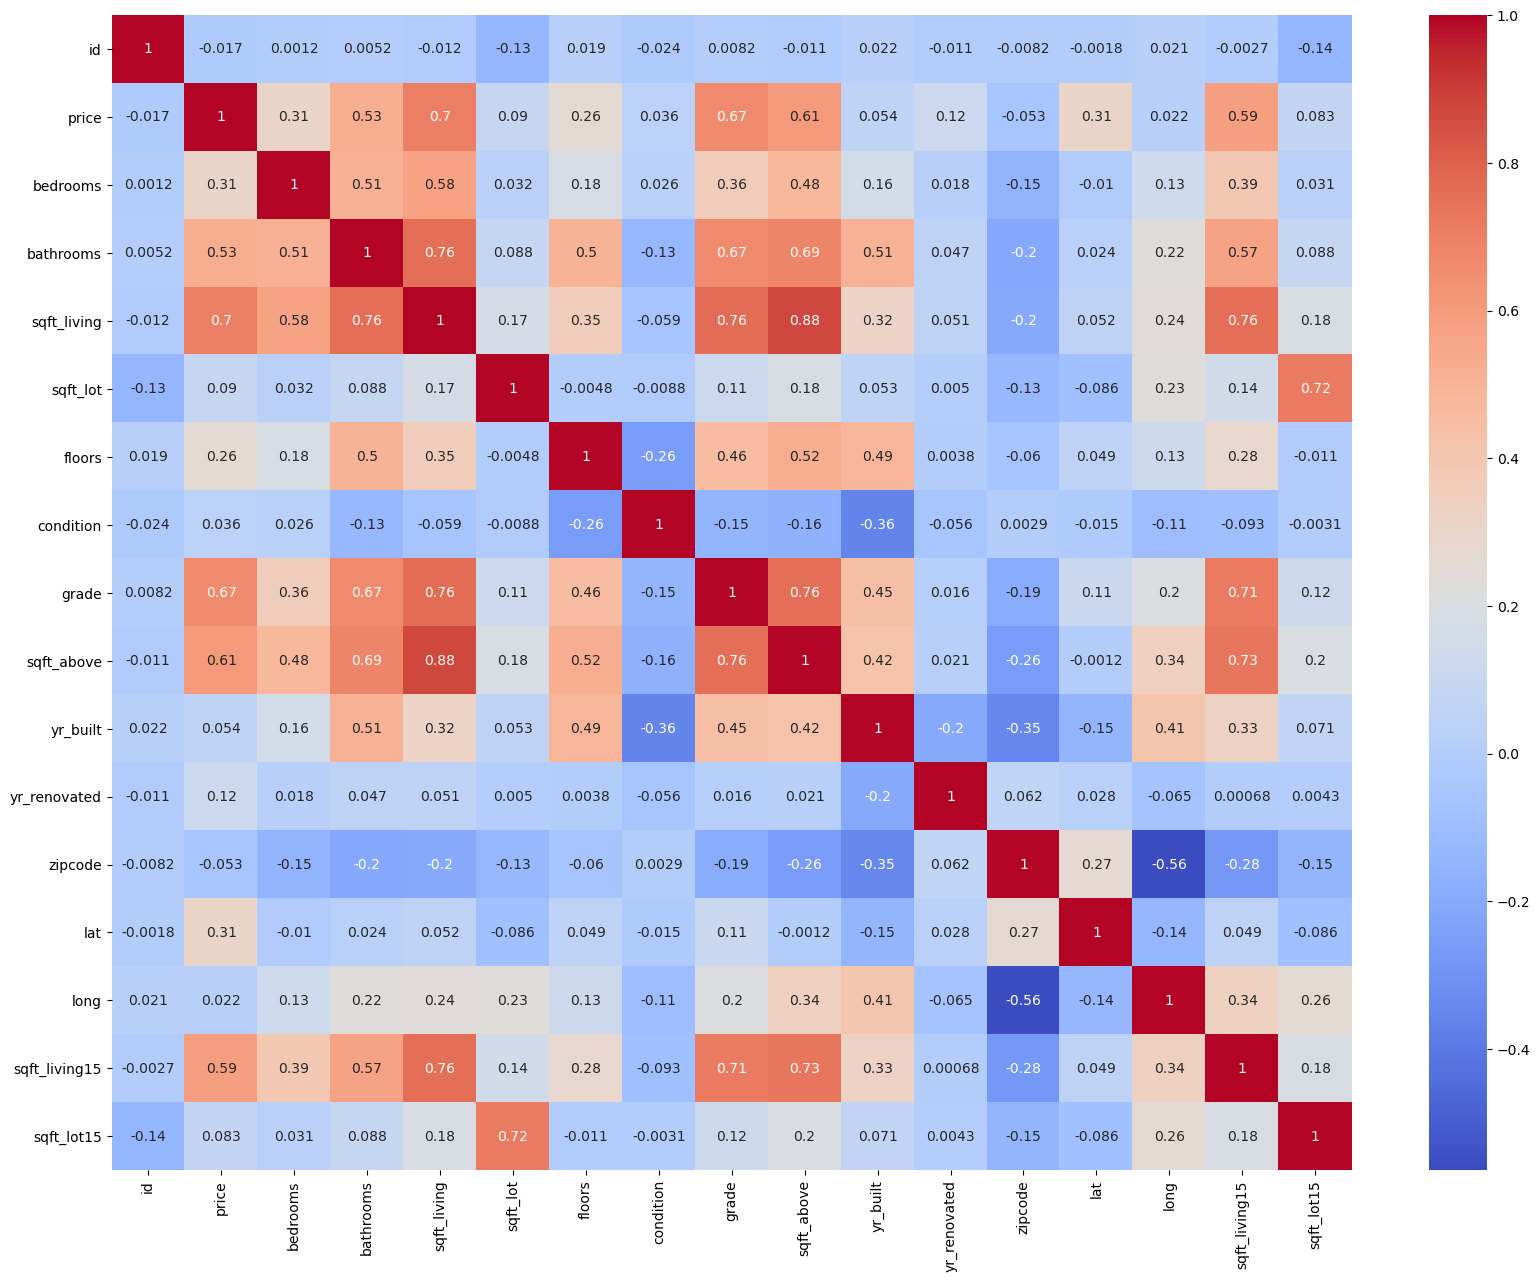

In [30]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),cmap="coolwarm",annot=True);

We have already determined that our predicted column is price, and will, therefore, be looking at the correlation of the rest of the columns with price<br>
Choose the features that have the highest collinearity with the price. These are:<br>
- Bathrooms
- sqft_living
- grade
- sqft_above
- sqft_living15

Based on the correlation coefficients with price from the KC Housing Data dataset, the most important features are:

    Bathrooms- Number of bathrooms
        Justification: Bathrooms RM has a strong positive correlation with price (0.53). This indicates that as the number of bathrooms in a home in increases, its price tends to increase as well.
        

    sqft_living - Footage of the home
        Justification: sqft_living has a very strong positive correlation with price (0.7). This indicates that as the square footage of the home increases, its price increases.

    grade - overall grade given to the housing unit, based on King County grading system
        Justification: Grade has a strong positive correlation with price (0.67). This indicates that as the grade of the home increases, its price increases.

    sqft_above - square footage of house apart from basement
        Justification: sqft_above has a strong correlation with price (0.61). This indicates that as the square footage of house apart from basement increase, its price increases.

    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
        Justification: sqft_living 15 has a strong correlation with price (0.59). This indicates that as the square footage of interior housing living space for the nearest 15 neighbors increases, the home's price increases.


### Checking the correlations for the selected important features
Create a pairplot with a regression line to show the best fit line

In [31]:
data2 = data[['bathrooms','sqft_living','grade','sqft_above','sqft_living15', 'price']]
data2.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15,price
0,1.00,1180,7,1180,1340,221900.0
1,2.25,2570,7,2170,1690,538000.0
2,1.00,770,6,770,2720,180000.0
3,3.00,1960,7,1050,1360,604000.0
4,2.00,1680,8,1680,1800,510000.0


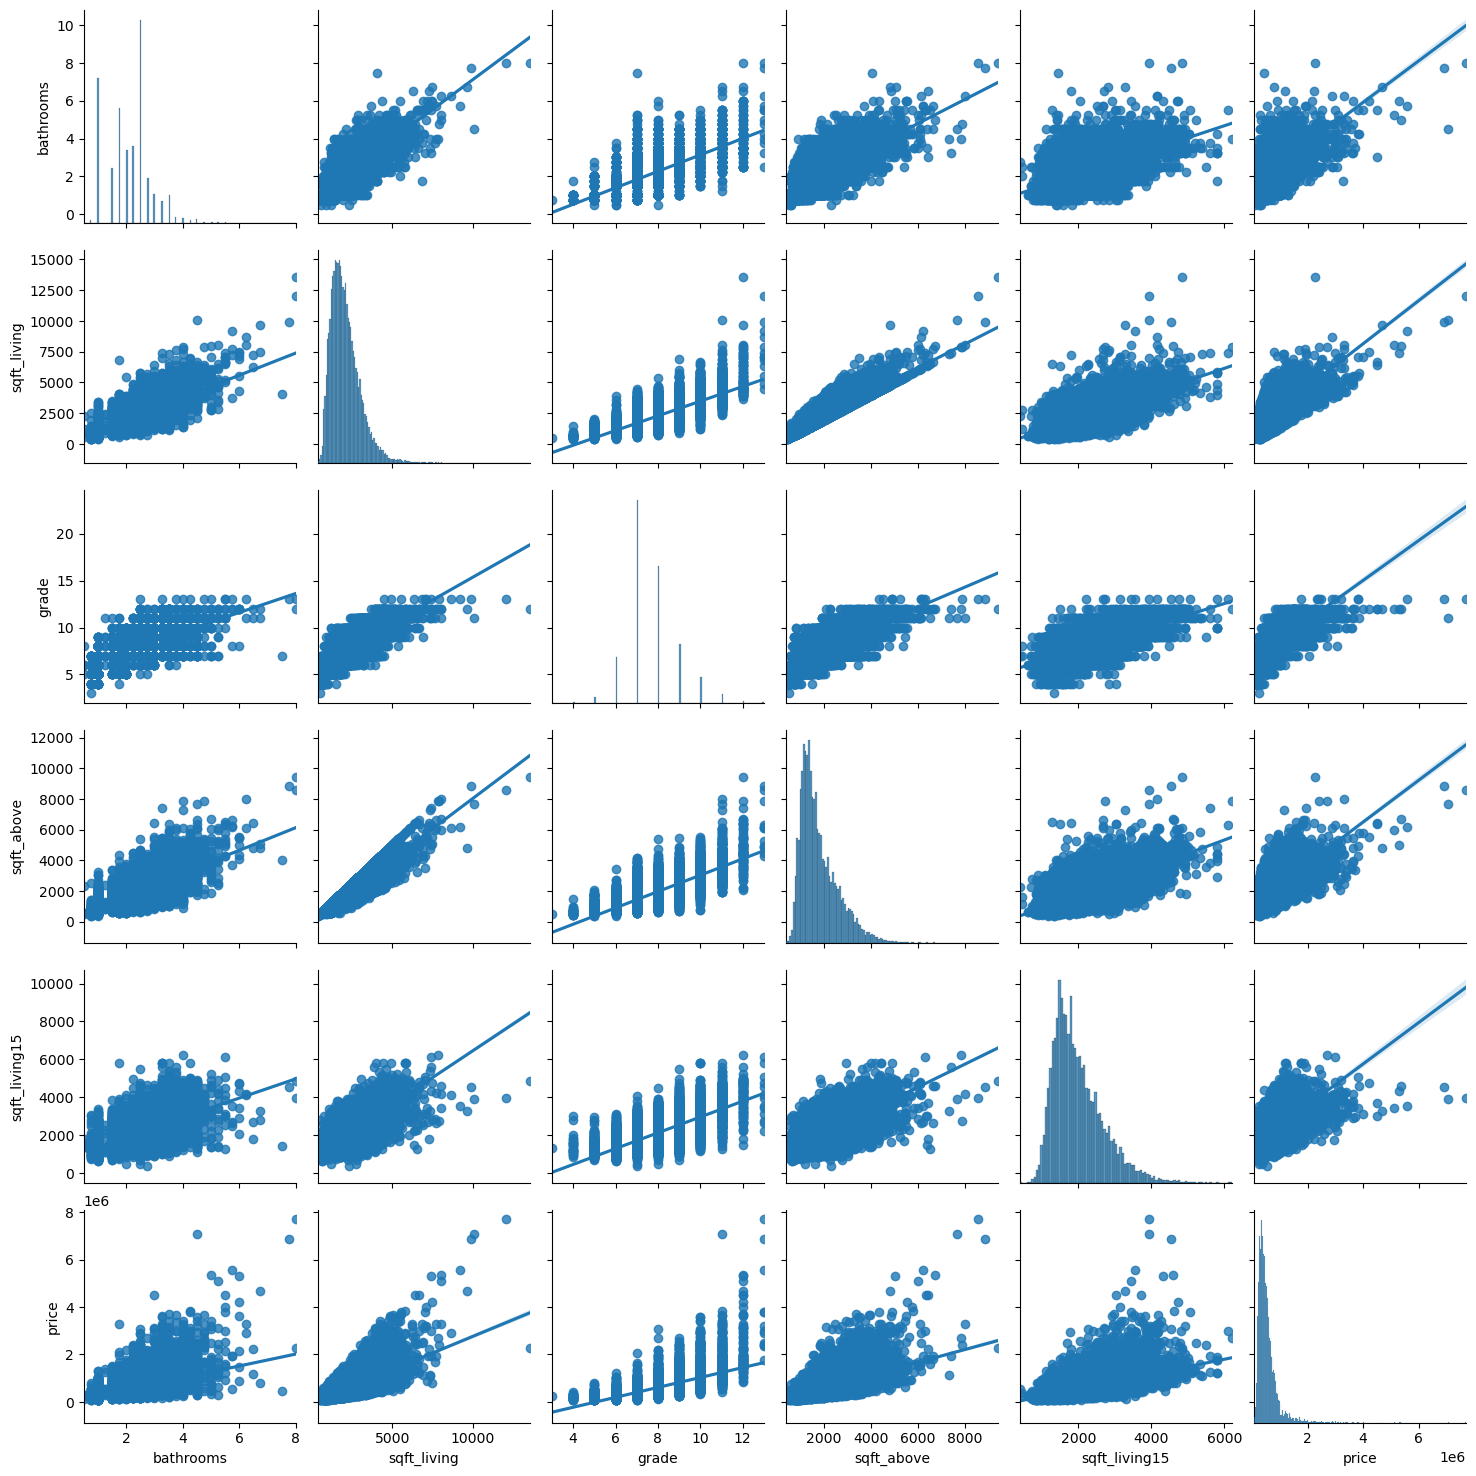

In [32]:

sns.pairplot(data2, kind = "reg");


Check for outliers

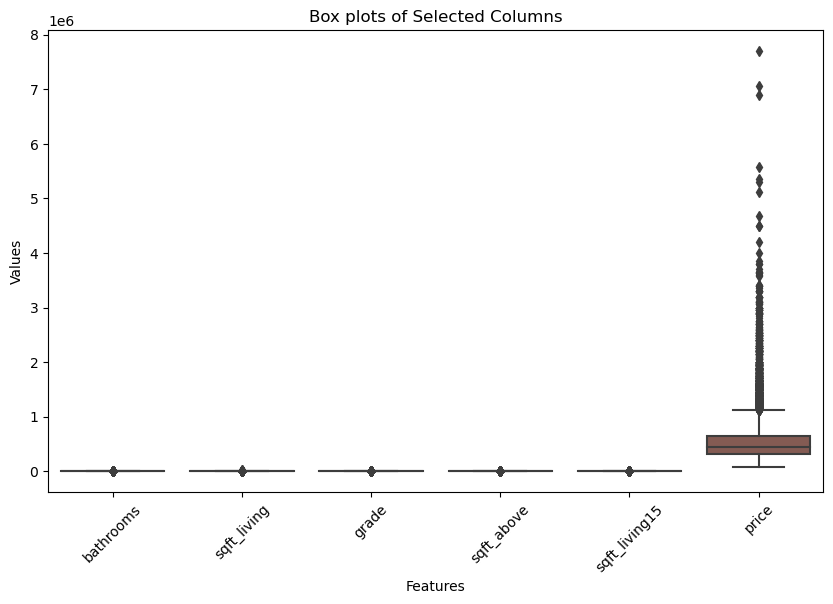

In [33]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data = data2)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show();

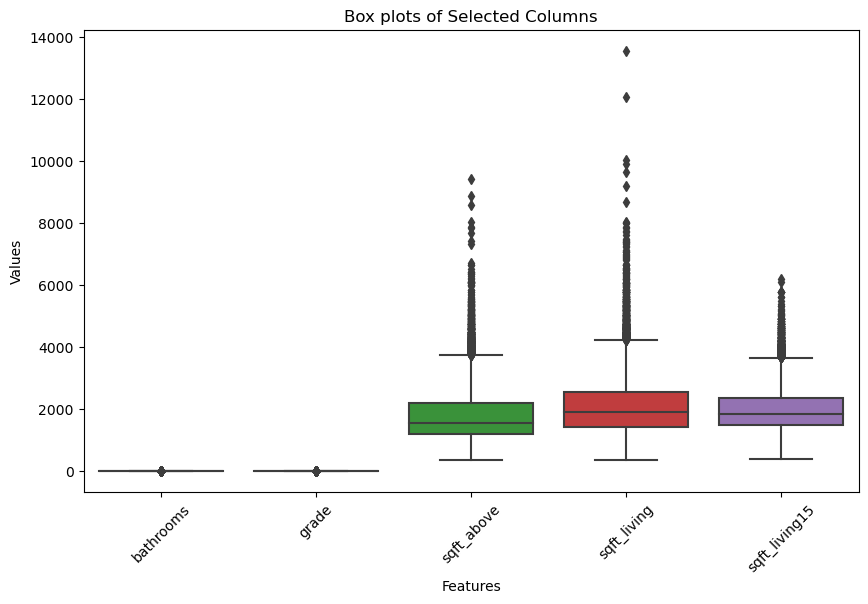

In [34]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data = data2[['bathrooms', 'grade', 'sqft_above', 'sqft_living', 'sqft_living15']])
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show();

In this case, outliers are part of the distribution and removing them presents a false representation of the problem<br>
Based on the box plots, the price is what seems to have a lot of outliers, which is good since it gives a proper representation of the market.

# 7. Data Analysis

### Analysis 1: What is the relationship between bathrooms and price?

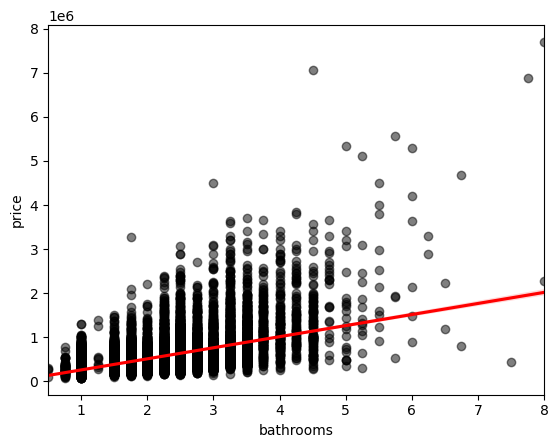

In [35]:
sns.regplot(x = data2['bathrooms'], y = data2['price'],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"});

**Trend Observation:**

 In the scatter plot with a regression line of bathrooms (number of bathrooms in house) against price, you can observe a positive trend. As the average number of bathrooms increases, the price of the house tends to increase as well.
 
**Implication:**

 This suggests that houses with more bathrooms generally have higher prices in the King County housing market. They are priced higher.

### Analysis 2: What is the Relationship between sqft_living and price?

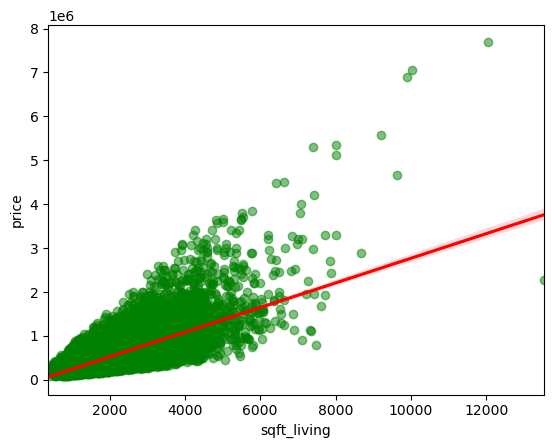

In [36]:
sns.regplot(x = data2['sqft_living'], y = data2['price'],
            scatter_kws = {"color": "green", "alpha": 0.5},
            line_kws = {"color": "red"});

**Trend Observation:**

 In the scatter plot with a regression line of square footage of the home (sqft_living) against price, you can observe a positive trend. As the average square footage of the home increases, the price of the house tends to increase as well.
 
**Implication:**

 This suggests that houses with a higher square footage have higher prices in the King County housing market. They are priced higher.

### Analysis 3: What is the relationship between Grade and Price

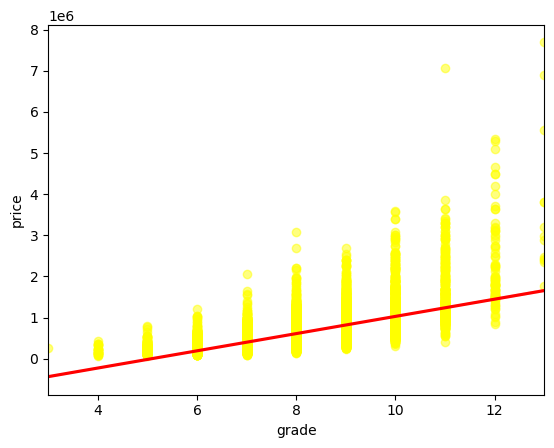

In [37]:
sns.regplot(x = data2['grade'], y = data2['price'],
            scatter_kws = {"color": "yellow", "alpha": 0.5},
            line_kws = {"color": "red"});

**Trend Observation:**

 In the scatter plot with a regression line of grade (overall grade given to the housing unit, based on King County grading system) against price, you can observe a positive trend. As the grade given to the home increases, the price of the house tends to increase as well.
 
**Implication:**

 This suggests that houses with a higher grade have higher prices in the King County housing market. They are priced higher.

### Analysis 4: What is the relationship between sqft_living15 and Price?

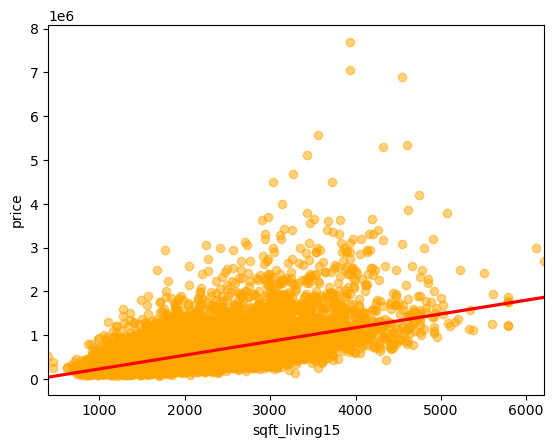

In [38]:
sns.regplot(x = data2['sqft_living15'], y = data2['price'],
            scatter_kws = {"color": "orange", "alpha": 0.5},
            line_kws = {"color": "red"});

**Trend Observation:**

 In the scatter plot with a regression line of grade (overall grade given to the housing unit, based on King County grading system) against price, you can observe a positive trend. As the grade given to the home increases, the price of the house tends to increase as well.
 
**Implication:**

 This suggests that houses with a higher grade have higher prices in the King County housing market. They are priced higher.

**Trend Observation:**

 In the scatter plot with a regression line of grade (overall grade given to the housing unit, based on King County grading system) against price, you can observe a positive trend. As the grade given to the home increases, the price of the house tends to increase as well.
 
**Implication:**

 This suggests that houses with a higher grade have higher prices in the King County housing market. They are priced higher.

# 8. Regression Results: Notebook clearly presents two features with strong relationships to sale prices
Explicitly identify the features and interpret their coefficients in plain language
Explain the implications of results for the real-world problem the project aims to address
Identify specific actions that stakeholders should take to leverage these results


# 9. Conclusion

### Objective 1:

### Objective 2:

### Objective 3:

### Objective 4: 

# Recommendation